## Example

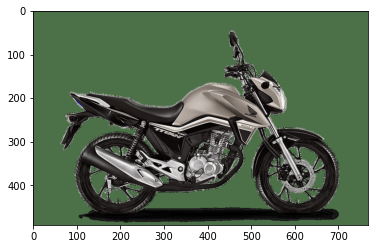

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

img = cv.imread("moto.png")
plt.imshow(img)
plt.show

### Pre-processing and evaluating the parameters

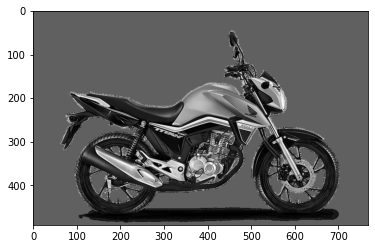

In [2]:
img = cv.imread("moto.png")
grey = cv.cvtColor(img, cv.COLOR_BGRA2GRAY)
plt.imshow(grey,cmap="gray")
plt.show()

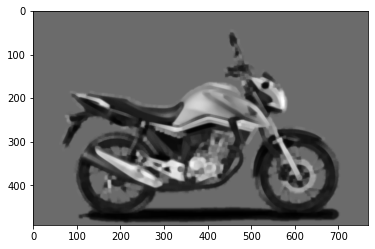

In [3]:
kernel = np.ones((5,5),np.uint8)
# Blurring and erasing little details
grey = cv.GaussianBlur(grey,(9,9),0)
grey = cv.morphologyEx(grey, cv.MORPH_OPEN, kernel)
grey = cv.morphologyEx(grey, cv.MORPH_CLOSE, kernel)
plt.imshow(grey,cmap="gray")
plt.show()

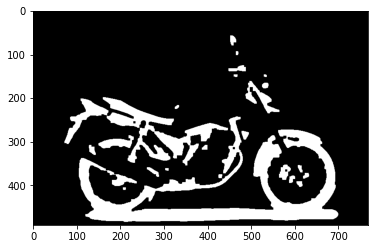

In [4]:
#Thresholding to highlight the more dark areas
grey = cv.threshold(grey,40,255,cv.THRESH_BINARY_INV)[1]
grey = cv.morphologyEx(grey, cv.MORPH_CLOSE, kernel)
plt.imshow(grey,cmap="gray")
plt.show()

Seeing what the internal canny would look like

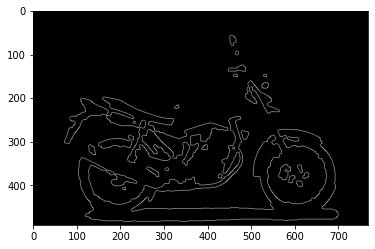

In [5]:
canny = cv.Canny(grey,100,200)
plt.imshow(canny,cmap="gray")
plt.show()

The parameters that I tuned were dp, minDist, param1. The other ones were get by seeing the image and deciding the best set

In [6]:
circles = cv.HoughCircles(grey,cv.HOUGH_GRADIENT,dp=1.1,minDist=300,param1=200,param2=40,minRadius=50, maxRadius=400)
print(circles)

[[[605.55    374.55002  66.39   ]
  [194.15001 374.55002  68.04   ]]]


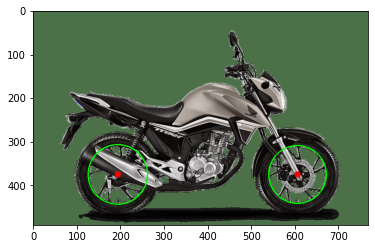

In [7]:
# Changing the dtype  to int
circles = np.uint16(np.around(circles))
cimg = img.copy()
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(255,0,0),10)
    
plt.imshow(cimg)

### Without pre-processing

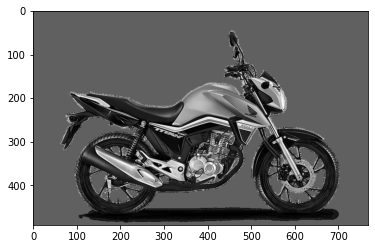

In [8]:
grey = cv.cvtColor(img, cv.COLOR_BGRA2GRAY)
plt.imshow(grey,cmap="gray")

The preset parameters as said by the documentation

In [9]:
circles = cv.HoughCircles(grey,cv.HOUGH_GRADIENT,dp=1,minDist=100,param1=100,param2=100)
print(circles)

[[[191.5 376.5  85.7]
  [306.5 206.5 208.2]
  [423.5 434.5 197. ]
  [494.5 361.5  94.4]
  [416.5 247.5  82.1]
  [293.5 341.5  75.4]
  [616.5 325.5  55.6]]]


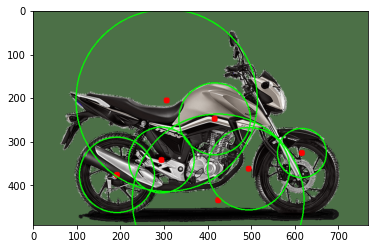

In [10]:
circles = np.uint16(np.around(circles))
cimg = img.copy()
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(255,0,0),10)
    
plt.imshow(cimg)
plt.show()

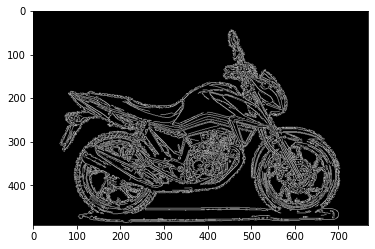

In [11]:
canny = cv.Canny(grey,50,100)
plt.imshow(canny,cmap="gray")
plt.show()